# Physical Properties of Seawater #

In [112]:
import xray
from matplotlib import pyplot as plt
import seaborn
import numpy as np
import gsw
seaborn.set(font_scale=2)
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,7)
from IPython.display import SVG, display, Image, display_svg

## What is Seawater? ##

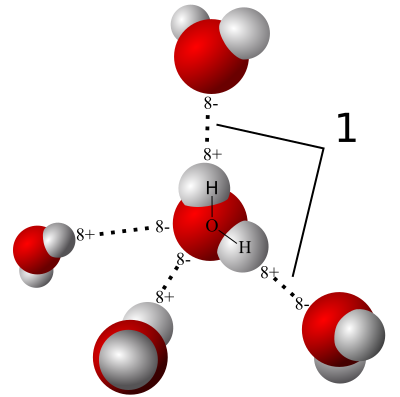

In [135]:
display_svg(SVG(url='https://upload.wikimedia.org/wikipedia/commons/c/c6/3D_model_hydrogen_bonds_in_water.svg'))

Model of hydrogen bonds between molecules of water.

Attribution: By User Qwerter at Czech wikipedia: Qwerter. Transferred from cs.wikipedia; Transfer was stated to be made by ``User:sevela.p``. Translated to english by by Michal Maňas (``User:snek01``). Vectorized by Magasjukur2. License: [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en). Via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File%3A3D_model_hydrogen_bonds_in_water.svg).

### Water Chemistry ###

Water is a polar molecule with a strong dipole moment. This means that there can be strong intermolecular electric forces, as hydrongen atoms of one molecule attract the oxygen atom of another. This _chemical_ property is ultimately responsible for many of water's exceptional _physical_ properties such as:

- Very high surface tension
- Very high heat capacity
- Very high latent heat of fusion
- Very high latent heat of evaporation

The last three properties in particular have major consequences for Earth's climate.

### Phases of Water ###

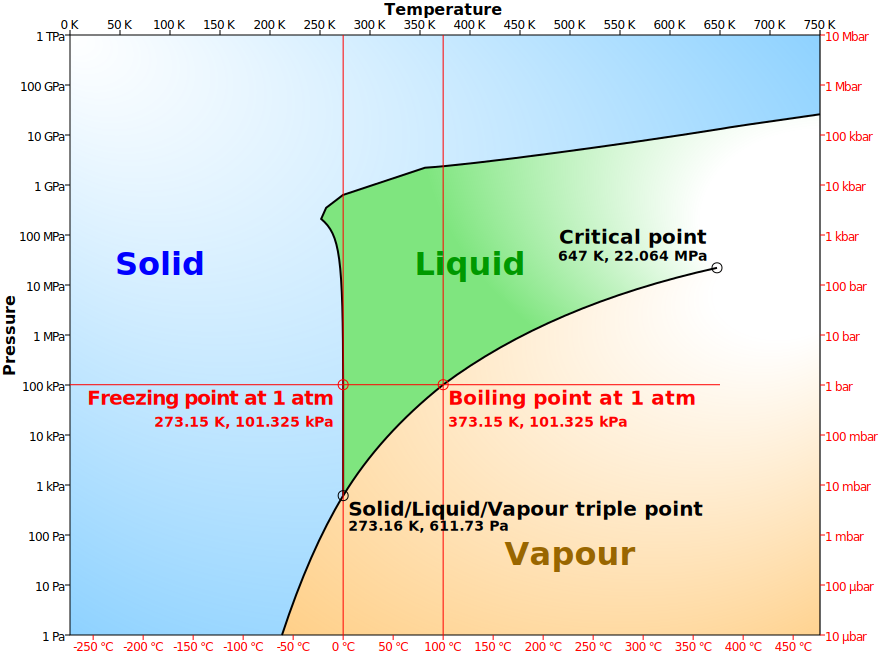

In [136]:
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/'
                '3/33/Phase_diagram_of_water_simplified.svg'))

Phase diagram of water as a log-lin chart with pressure from 1 Pa to 1 TPa and temperature from 0 K to 650 K. Simplified version.

Attribution: By author of the original work: Cmglee (Own work) License:[CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0)]. Via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File%3APhase_diagram_of_water_simplified.svg)

    

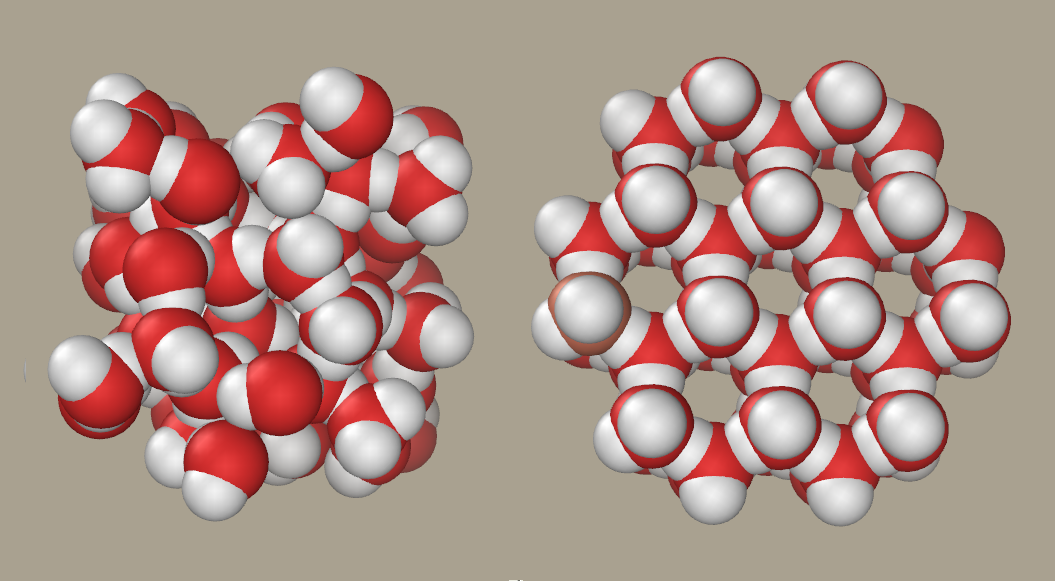

In [4]:
Image('https://upload.wikimedia.org/wikipedia/commons/0/03/Liquid-water-and-ice.png',
     width=800)

Liquid water and ice molecular structure.

Attribution: By P99am (Own work). License: [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0). Via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Liquid-water-and-ice.png)

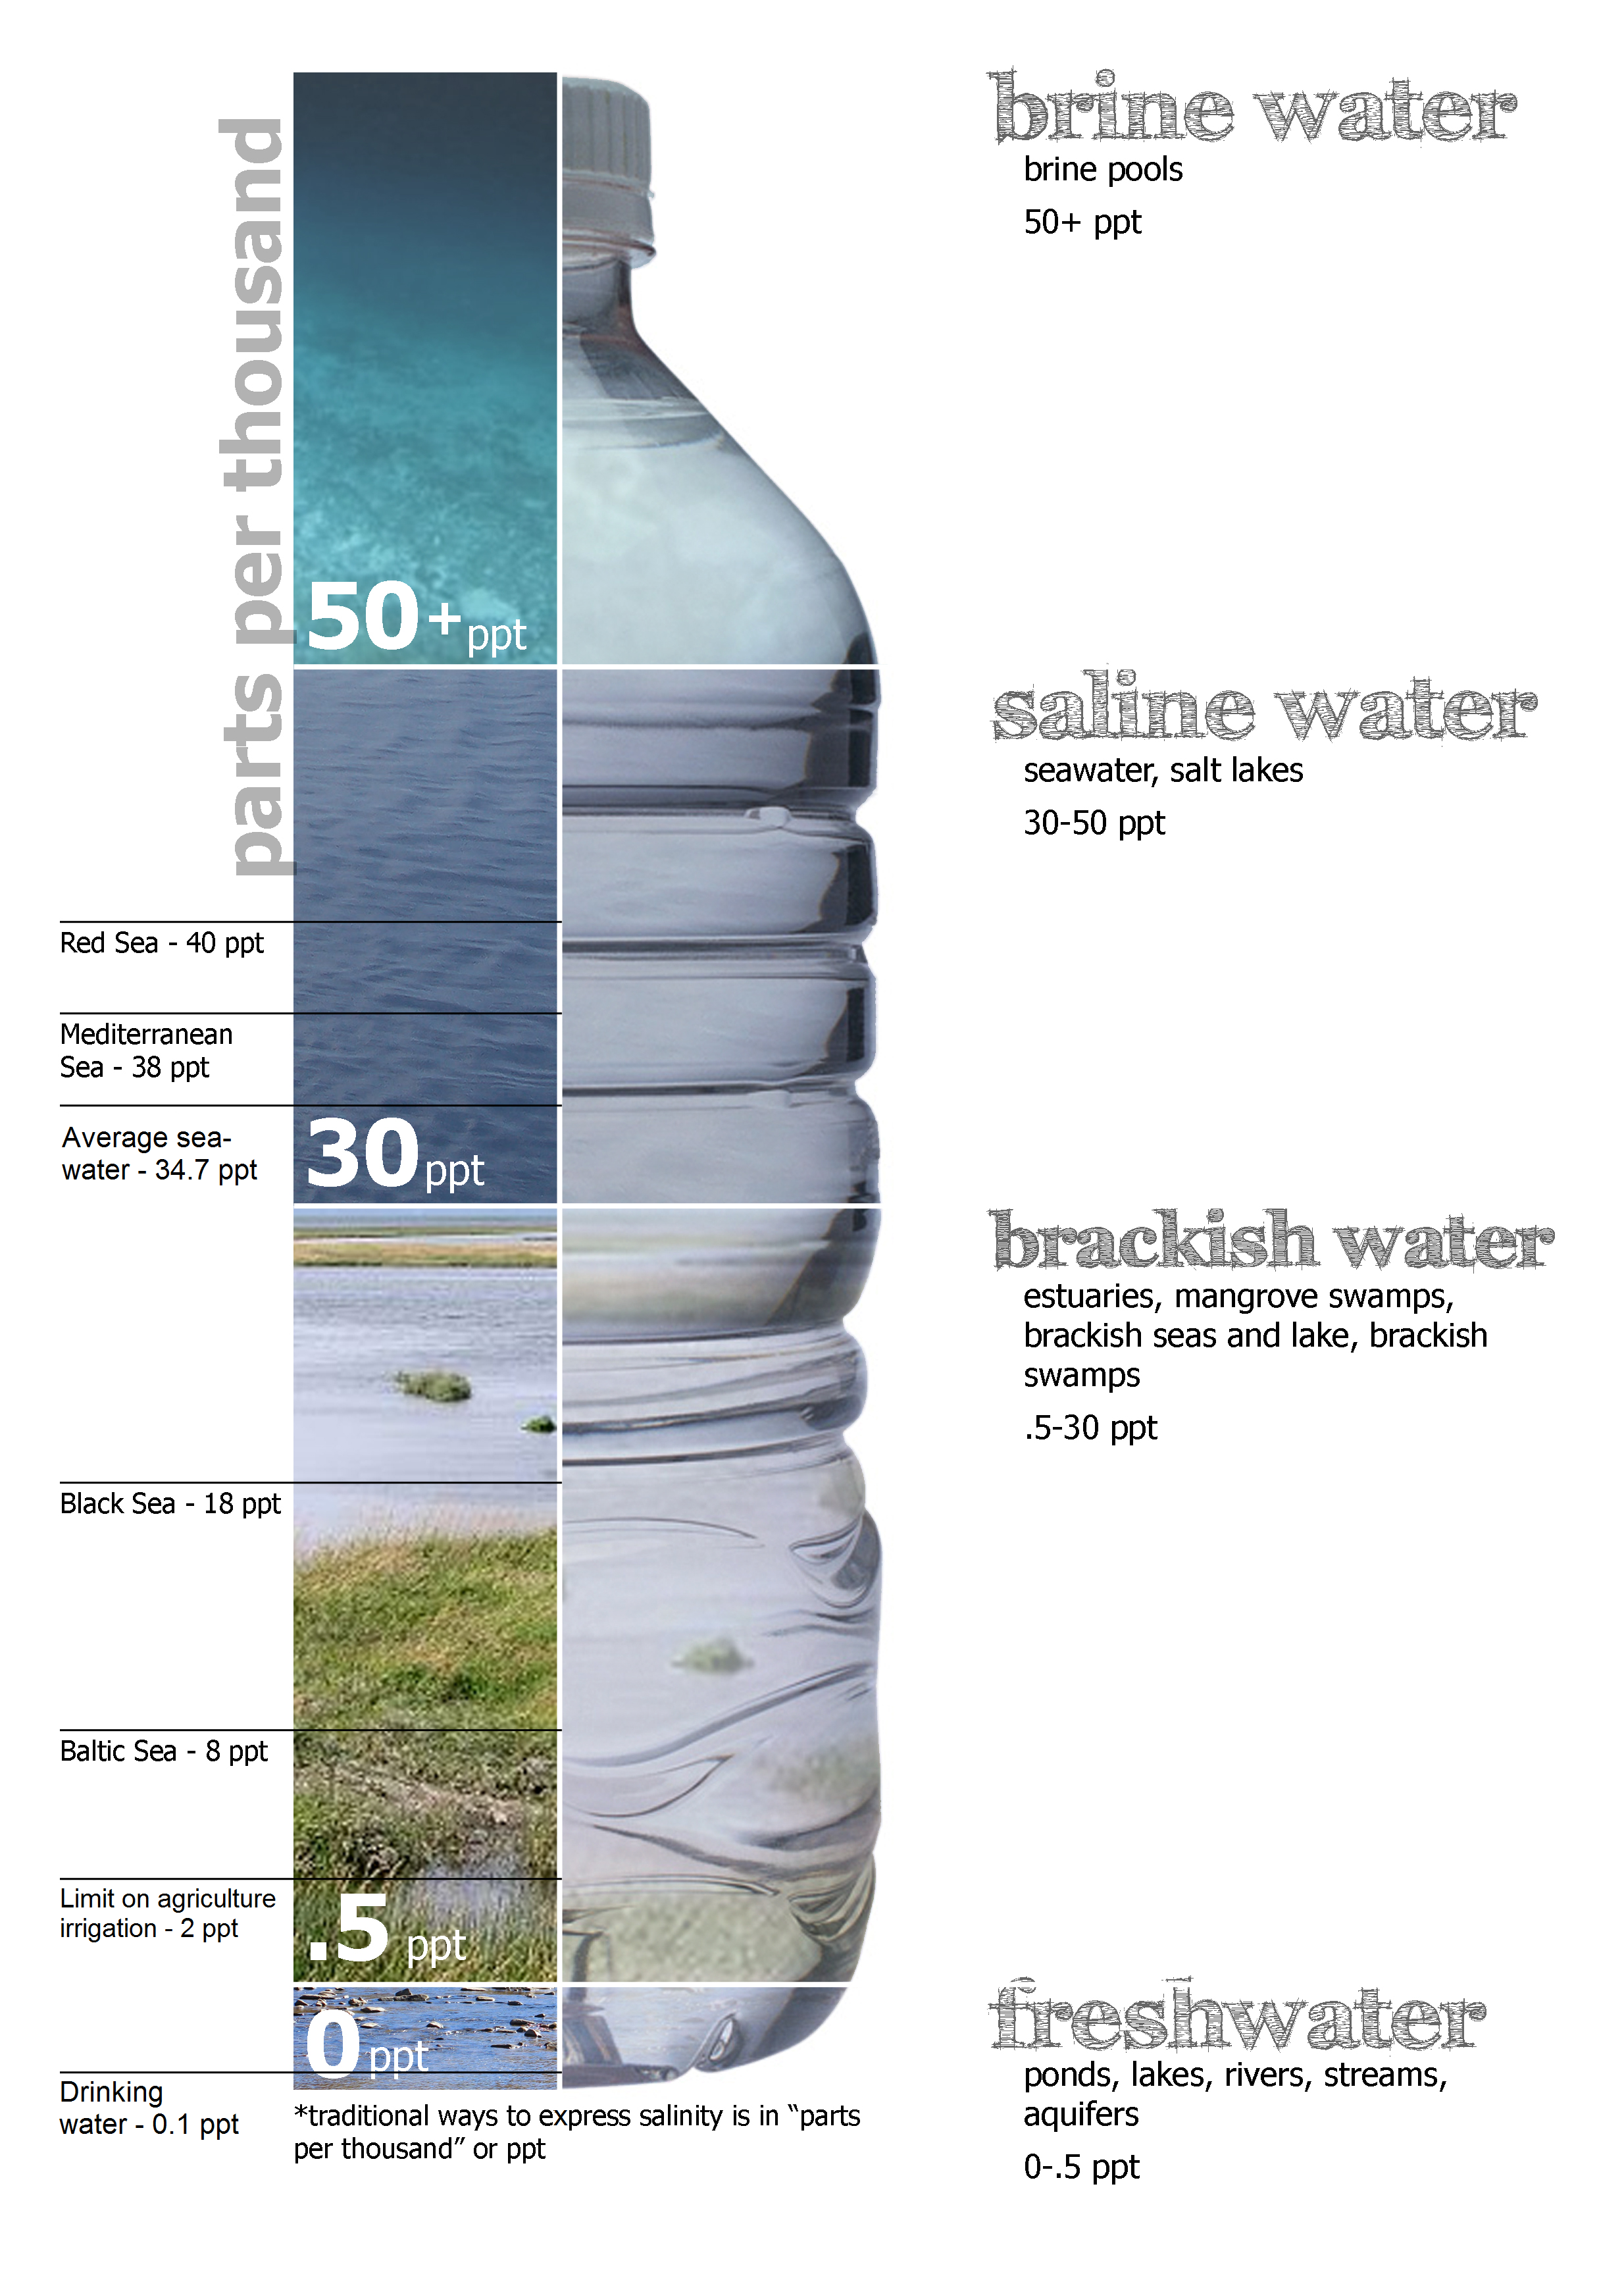

In [16]:
Image('https://upload.wikimedia.org/wikipedia/commons/9/98/Water_salinity_diagram.png',
      width=500)

Graphic breakdown of water salinity, defining freshwater, brackish water, saltwater, and brine water.

Attribution: By Peter Summerlin (Own work). License: [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0). Via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File%3AWater_salinity_diagram.png)


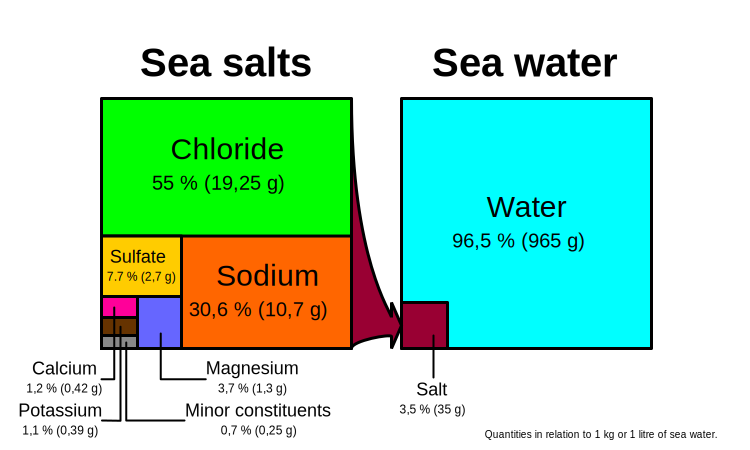

In [63]:
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/2/22/Sea_salt-e_hg.svg'))

Proportion of salt to sea water (right) and chemical composition of sea salt

Attribution: By Hannes Grobe, Alfred Wegener Institute for Polar and Marine Research, Bremerhaven, Germany; SVG version by Stefan Majewsky (Own work). Licesnse: [CC BY-SA 2.5](http://creativecommons.org/licenses/by-sa/2.5). Via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File%3ASea_salt-e_hg.svg)

## How do we describe and measure salinity? ##

__Absolute Salinity__ ($S_A$) represents, to the best available accuracy (and with certain caveats), the mass fraction of dissolved solute in so-called Standard Seawater with the same density as that of the sample. $S_A$ is the quantity used in the latest seawater equation of state, TEOS-10. $S_A$ has units of g / kg, i.e. mass fraction parts per thousand.

$S_A$ is not measured directly. In practice, salinity is inferred from the conductivity of seawater (which can be measured _in-situ_ with electronic instruments) and reported as __"practical salinity"__ $S_P$. The $S_P$ measurements are then converted to $S_A$ based on either measurements of other trace chemicals or estimated based on the geographic location of the sample. Most archived data is reported in $S_P$, not $S_A$. TEOS-10 is a new standard that is slowly being adopted by the community.

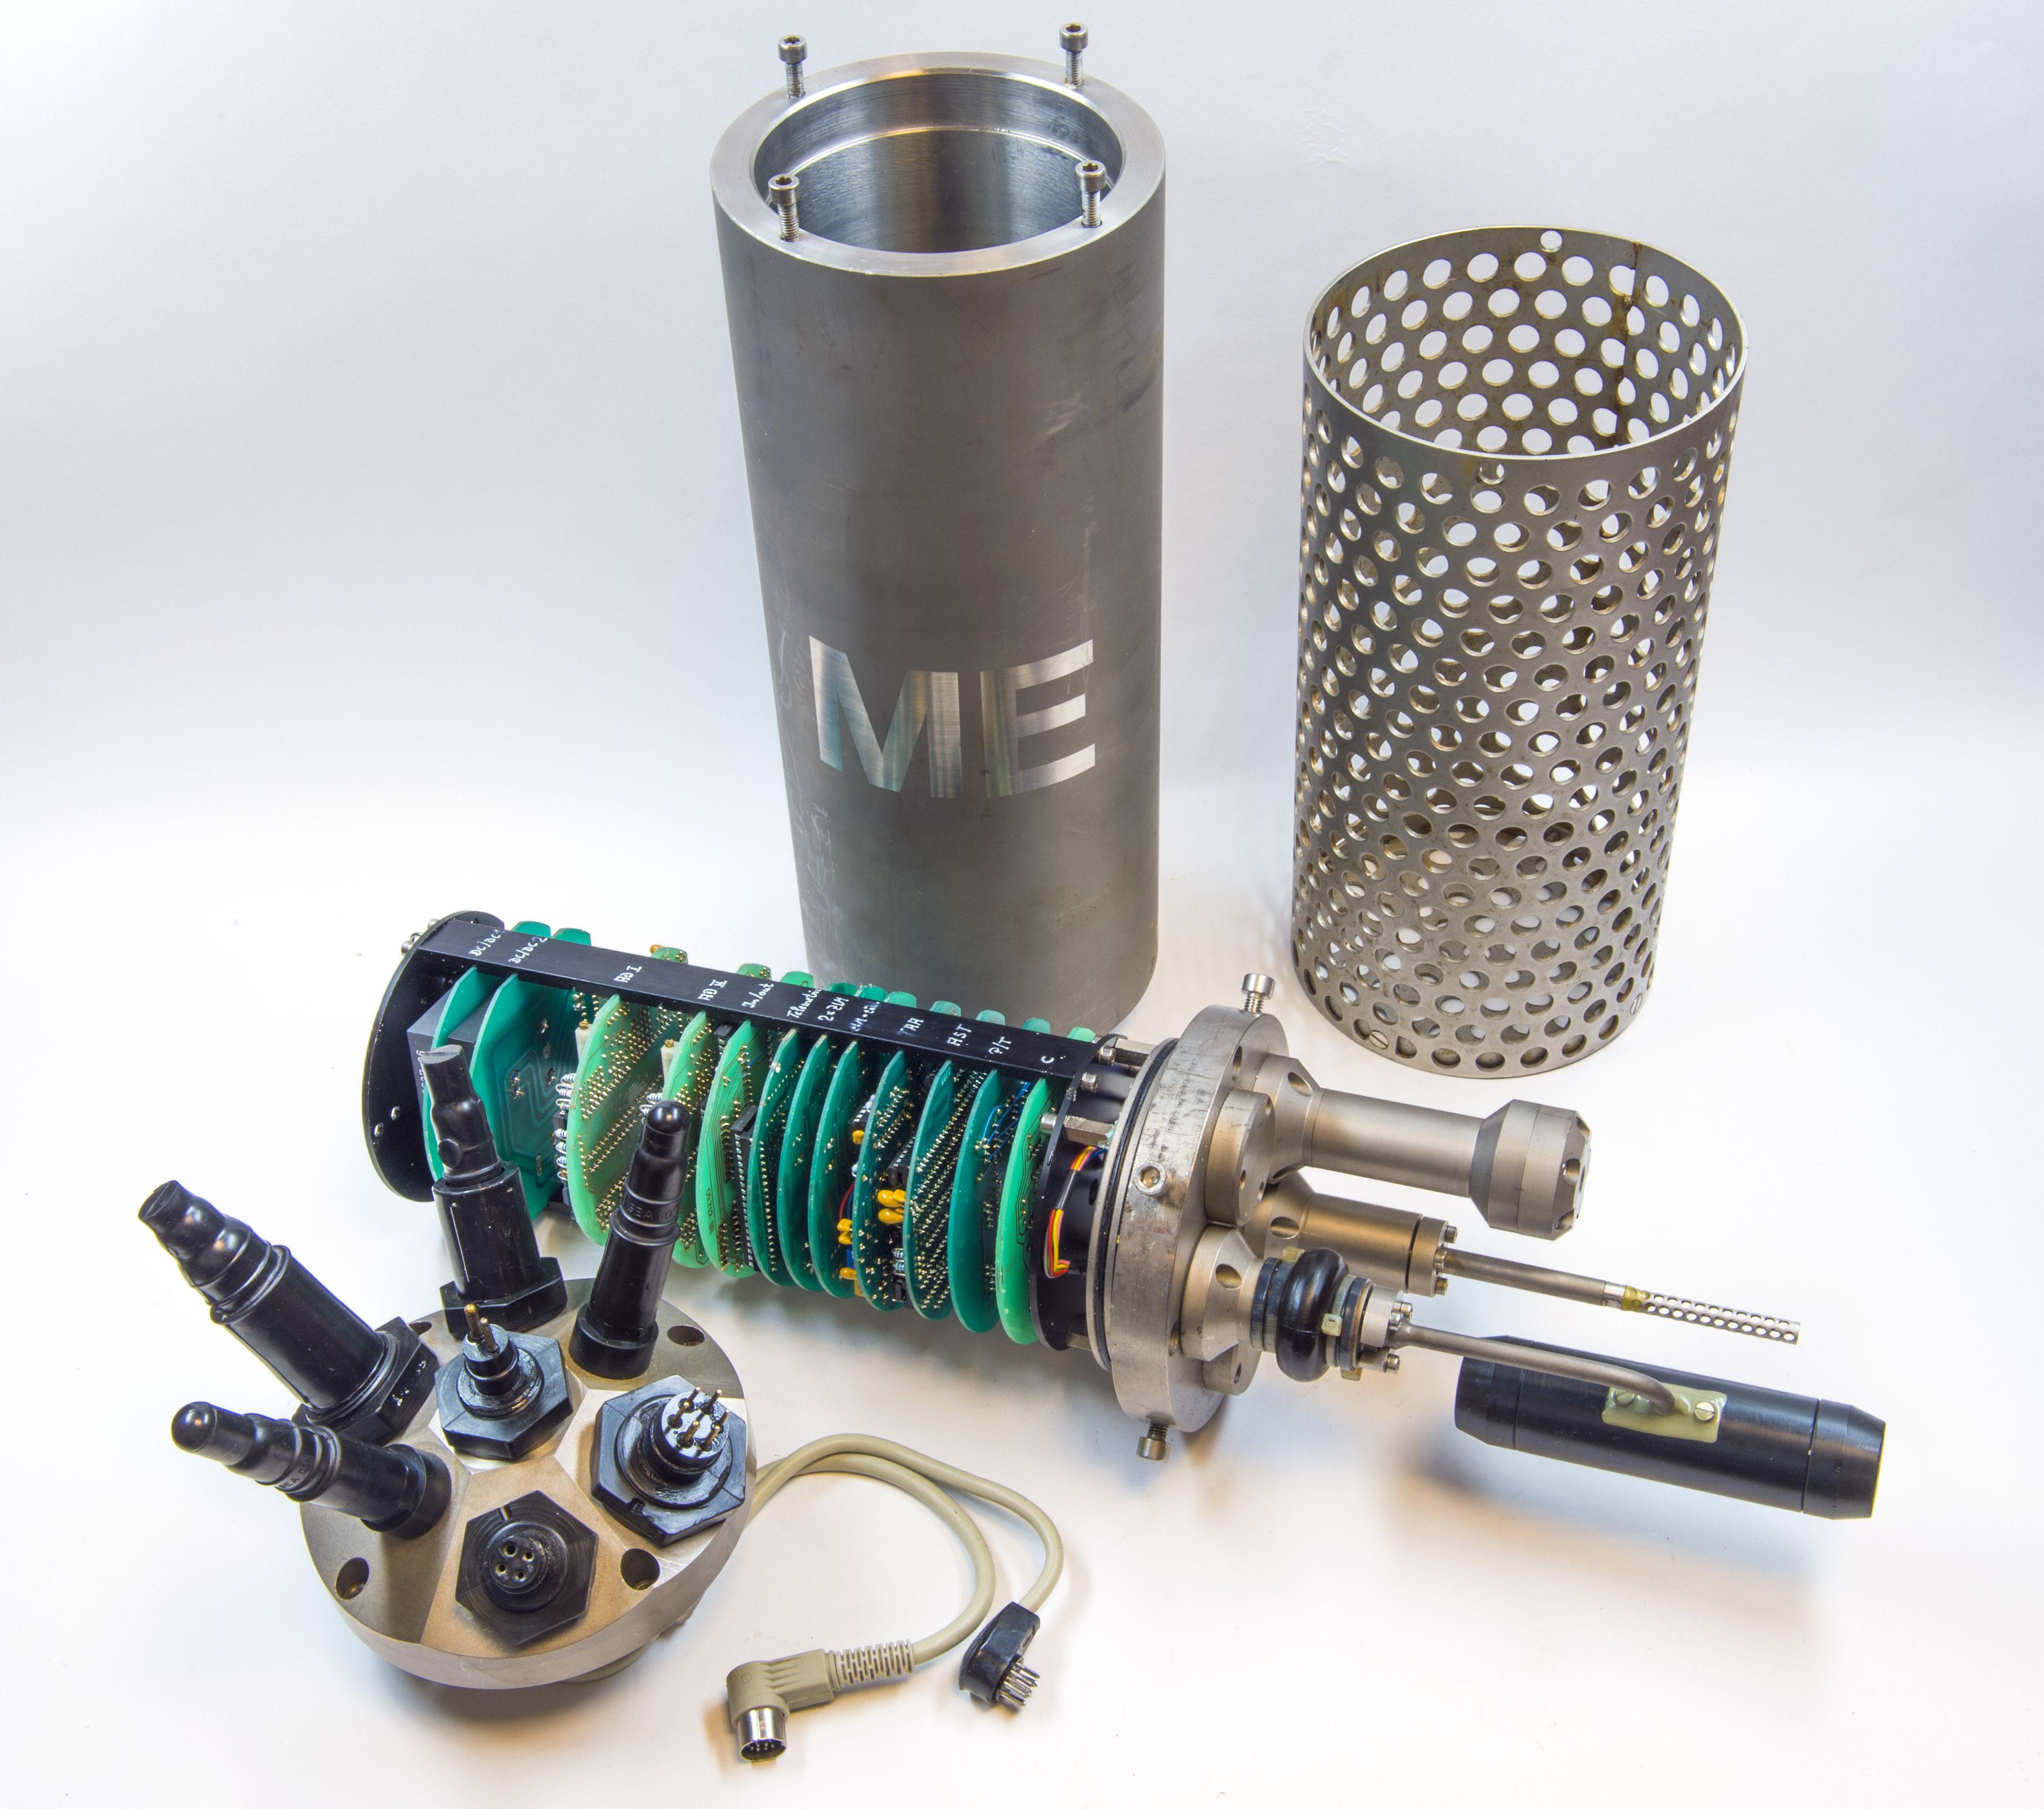

In [12]:
Image("https://upload.wikimedia.org/wikipedia/commons/b/ba/CTD-me-details_hg.jpg", width=400)

Parts of a CTD (Conductivity, Temperature, Depth), disassembled. Oceanographic device to determine water masses in the oceans from research vessels: - electronics with sensors for conductivity, temperature and pressure (Manufactured by ME GRISARD GMBH in the 1980s) - cage to protect sensors - water tight conectors - housing for high water pressure

By Hannes Grobe (Own work) [CC BY 3.0 (http://creativecommons.org/licenses/by/3.0)], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File%3ACTD-me-details_hg.jpg)

## Heat Content ##

In general, the thermal energy of a material is given by

$$
U = \int \int \int \rho c_p T dv
$$

where $\rho$ is the density, $c_p$ is the heat capacity, and $T$ is the temperature. The units of energy are Joules

Let's compare the heat that can be stored by the ocean and the atmosphere. The following table gives values for air and seawater near sea level. 

|Parameter|$\rho$ (kg m$^{-3}$)|$c_p$ (J K$^{-1}$ kg$^{-1}$)|
|--|--------|-----------------------|
|__Atmosphere__ | 1.3 | 1004  |
|__Ocean__ | 1023 | 4218 |

_Question:_ How much more heat can be stored in 1 square meter of ocean than one square meter of air?

## Internal Energy ##

Temperature $T$ is not conserved under adiabatic displacements or addition / subtraction of salinity.


In [62]:
# initial conservative temperature
t0 = 10. # degrees C
# initial pressure
p0 = 0 
# initial absolute salinity
sa0 = 35.
# intial conservative temperature
ct0 = gsw.CT_from_t(sa0,t0,p0)
# new pressure
p = 4000

gsw.t_from_CT(sa0,ct0,p)

10.561554553157489

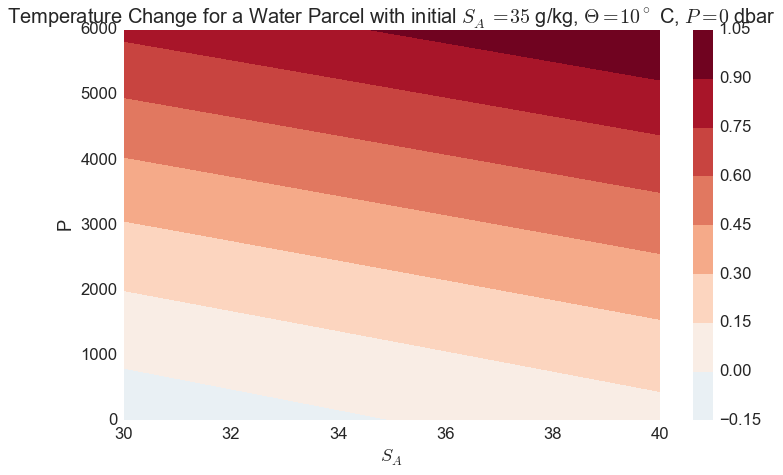

In [69]:

sa_range = np.linspace(30,40,100)
p_range = np.linspace(0,6000,80)
t = gsw.t_from_CT(sa_range[np.newaxis], ct0, p_range[:,np.newaxis])
plt.contourf(sa_range, p_range, t - t0, cmap='RdBu_r')
plt.clim([-1,1]);plt.colorbar()
plt.xlabel('$S_A$'); plt.ylabel('P')
plt.title('Temperature Change for a Water Parcel with initial '
          '$S_A = 35$ g/kg, $\Theta = 10^\circ$ C, $P=0$ dbar')

## Enthalpy and Conservative Temperature ##

__Specific enthalpy__ is represented by $h$ and has units of J/kg. A change in $h$ is equal to the change in the internal energy of the system (thermal and chemical), plus the pressure work that the system does on its surroundings (compressibility), at constant pressure.

__Potential enthalpy__ $h_0$ is the enthalpy a water parcel _would have_ if brought adiabatically to surface pressure.


The __conservative temperature__ is defined in TEOS-10 as

$$ \Theta = \frac{h_0}{c_p^0} $$

where $c_p^0$ is a _constant scale factor_.

A more complete measure of heat content of the ocean is

$$  \int \int \int \rho h_0 dv = c_p^0 \int \int \int \rho \Theta dv $$

This change in this quantity is proportional to the heat flux through the ocean surface. Furthermore $\Theta$ is _conserved_ following the fluid flow. (More on this to come.)

Prior to TEOS-10, __potential temperature__ ($\theta$) was the preferred temperature variable. $\theta$ is the temperature that the water would have if it were brought adiabatically to the surface. Potential temperature was abandonded because it is not a conserved quantity and is not proportional to the heat content of the fluid.

In [137]:
# initial conservative temperature
t0 = 10. # degrees C
# initial pressure
p0 = 2000
# initial absolute salinity
sa0 = 38.
# conservative temperature
ct = gsw.CT_from_t(sa0,t0,p0)
# potential temperature
tp = gsw.pt_from_CT(sa0,ct)

ct, tp

(9.6774299194040445, 9.7394192020416632)

## Density ##

The density $\rho$ is an extremely important quantity. Density has units kg m$^{-3}$ and represents the amount of mass per unit volume.

Density is a nonlinear function of $S_A$, $\Theta$, and $p$.

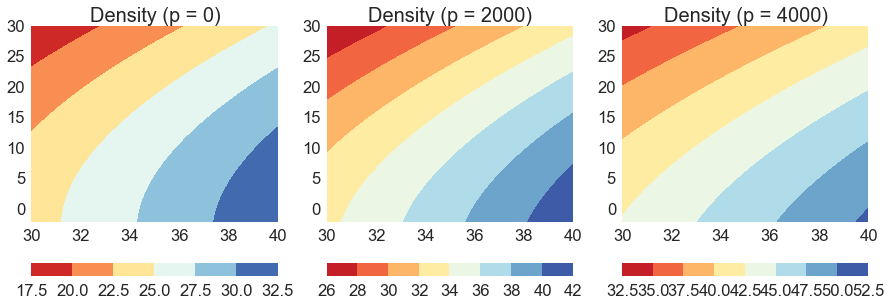

In [70]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
ct_range = np.linspace(-2,30,90)

for p, ax in zip([0,2000,4000], axes):
    rho = gsw.rho(sa_range[np.newaxis], ct_range[:,np.newaxis], p) - 1000
    cf = ax.contourf(sa_range, ct_range, rho, cmap='RdYlBu')
    plt.colorbar(cf, ax=ax, orientation='horizontal')
    ax.set_title('Density (p = %g)' % p)

_Question_: What is the impact of $S_A$, $\Theta$ and $p$ on density?

## Thermal Expansion ##

When water warms, it expands, and its density goes down. We measure thermal expansion as the relative change in density with respect to consevative temperature when pressure and salinity are held fixed:

$$
\alpha^\Theta = \alpha^\Theta(S_A, \Theta, p) = -\frac{1}{\rho} \frac{\partial \rho}{\partial \Theta}|_{S_A, p}
$$

The minus sign is a convention to make $\alpha^\Theta$ positive.

_Question:_ What are the units of $\alpha^\Theta$?

In [105]:
alpha_sact = gsw.alpha(sa_range[np.newaxis], ct_range[:,np.newaxis], 0)
prange = np.linspace(0,5000,40)
alpha_pct = gsw.alpha(35, ct_range[:,np.newaxis], prange[np.newaxis])

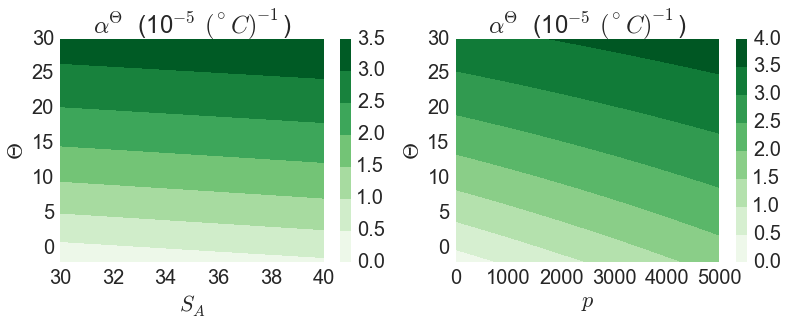

In [117]:
fig, ax = plt.subplots(ncols=2, figsize=(13,4))
cf = ax[0].contourf(sa_range, ct_range, 10000*alpha_sact, cmap='Greens')
plt.colorbar(cf, ax=ax[0]);
ax[0].set_title(r'$\alpha^\Theta$ (10$^{-5}$ $(^\circ C)^{-1}$)');
ax[0].set_xlabel(r'$S_A$'); ax[0].set_ylabel(r'$\Theta$')
cf = ax[1].contourf(prange, ct_range, 10000*alpha_pct, cmap='Greens')
plt.colorbar(cf, ax=ax[1]);
ax[1].set_title(r'$\alpha^\Theta$ (10$^{-5}$ $(^\circ C)^{-1}$)');
ax[1].set_xlabel(r'$p$'); ax[1].set_ylabel(r'$\Theta$')

## Haline Contraction ##

When water gains salt, its density goes up. We measure this with the haline contraction coefficient $\beta^\Theta$.

$$
\beta^\Theta = \beta^\Theta(S_A, \Theta, p) = \frac{1}{\rho} \frac{\partial \rho}{\partial S_A}|_{\Theta, p}
$$

In [123]:
beta_sact = gsw.beta(sa_range[np.newaxis], ct_range[:,np.newaxis], 0)
beta_pct = gsw.beta(35, ct_range[:,np.newaxis], prange[np.newaxis])

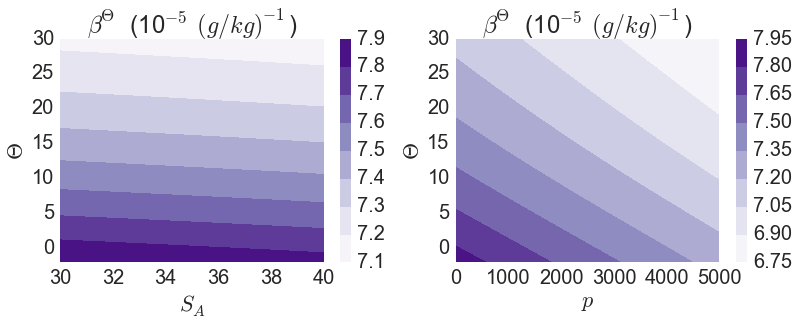

In [124]:
fig, ax = plt.subplots(ncols=2, figsize=(13,4))
cf = ax[0].contourf(sa_range, ct_range, 10000*beta_sact, cmap='Purples')
plt.colorbar(cf, ax=ax[0]);
ax[0].set_title(r'$\beta^\Theta$ (10$^{-5}$ $(g/kg)^{-1}$)');
ax[0].set_xlabel(r'$S_A$'); ax[0].set_ylabel(r'$\Theta$')
cf = ax[1].contourf(prange, ct_range, 10000*beta_pct, cmap='Purples')
plt.colorbar(cf, ax=ax[1]);
ax[1].set_title(r'$\beta^\Theta$ (10$^{-5}$ $(g/kg)^{-1}$)');
ax[1].set_xlabel(r'$p$'); ax[1].set_ylabel(r'$\Theta$')

## Adiabatic Compressibility ##

When conservative temperature and absolute salinity are held fixed as pressure is increased, the fluid is compressed. This property is quantified by the compressibility coefficient

$$
\kappa = \frac{1}{\rho}\frac{\partial \rho}{\partial p}|_{S_A, \Theta}
$$

The speed of sound $c$ in seawater is directly related to compressibility.

$$
c =  \frac{1}{\sqrt{\rho \kappa}}
$$


In [125]:
c_sact = gsw.sound_speed(sa_range[np.newaxis], ct_range[:,np.newaxis], 0)
c_pct = gsw.sound_speed(35, ct_range[:,np.newaxis], prange[np.newaxis])

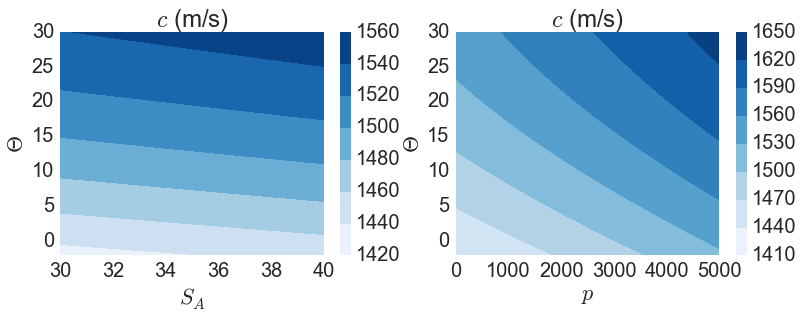

In [126]:
fig, ax = plt.subplots(ncols=2, figsize=(13,4))
cf = ax[0].contourf(sa_range, ct_range, c_sact, cmap='Blues')
plt.colorbar(cf, ax=ax[0]);
ax[0].set_title(r'$c$ (m/s)');
ax[0].set_xlabel(r'$S_A$'); ax[0].set_ylabel(r'$\Theta$')
cf = ax[1].contourf(prange, ct_range, c_pct, cmap='Blues')
plt.colorbar(cf, ax=ax[1]);
ax[1].set_title(r'$c$ (m/s)');
ax[1].set_xlabel(r'$p$'); ax[1].set_ylabel(r'$\Theta$')

## An Approximate Equation of State ##

This equation contains the "essential" nonlinearities in the equation of state of seawater.

$$ \rho \simeq \rho_0 \left [ 1 - \frac{gz}{c_0^2} - \alpha_0(1 - \gamma_B z)(\Theta - \Theta_0)
- \frac{\gamma_C}{2}(\Theta - \Theta_0)^2 + \beta_0 (S_A - S_{A0} ) \right ]
$$

where $\rho_0$, $c_0$, $\alpha_0$, $\gamma_B$, $\gamma_C$, and $\beta_0$ are all positive constants.
Here we have assumed that pressure $p$ is simply proportional to depth $z$. (As we will see next, this is a very good approximation.)

The parameter $\gamma_B$ expresses the nonlinear effect of __thermobaricity__. The parameter $\gamma_C$ expresses the nonlinear effect of __cabbeling__.

## Pressure ##

Pressure is an isotropic "force per square meter"

Pressure has units of "Pascals".

$$
Pa = \frac{N}{m^2} = \frac{kg}{m s^2}
$$


"Sea pressure" $p$ is absolute pressure minus a constant reference atmospheric pressure:

$$ p = P - P_0 $$

where $P_0 = 101,325$ Pa. In oceanography we use decibars (dbar) as units.

$$ 1 dbar = 10^5 Pa $$

_Question:_ Approximately how many dbar of pressure are needed to equal $P_0$?

## Hydrostatic Balance ##

How much pressure does the water column exert? In other words, what is the weight of 1 square meter of ocean?

$$
p(z) = g \int_z^0 \rho(z') dz'
$$

The pressure at depth $z$ is given by the mass of water above. We can re-express this as

$$
\boxed{\frac{\partial p}{\partial z} = - g \rho}
$$

This equation is known as the __hydrostatic balance__.

## Buoyancy ##

A water parcel experiences a __buoyancy force__ if its density differs from the ambient density.

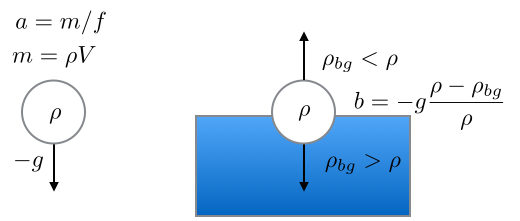

In [127]:
Image("02_images/buoyancy.png")

## Static Stability ##

Static stability measures how quickly a water parcel is restored to its position in the water column if it is displaced vertically. If the stability is negative, the water column has the potential to overturn.

An obvious, but slightly flawed, measure of stability would be

$$ N^2 = -\frac{g}{\rho} \frac{\partial \rho}{\partial z} $$

_Question:_ What is wrong with this definition?

## Buoyancy Frequency ##

The problem with the previous definition of stability is that it doesn't account for the adiabatic compressibility of water. If a parcel is displaced vertically, its pressure will change, causing a change in density. We need to subtract this effect.

$$ N^2 = -\frac{g}{\rho} \frac{\partial \rho}{\partial z} + \kappa \frac{\partial p}{\partial z}
= g(\alpha^\Theta \frac{\partial \Theta}{\partial z} - \beta^\Theta \frac{\partial S_A}{\partial z}) $$

$N$ is called the __buoyancy frequency__ because a displaced parcel will oscillated with frequency $N$. This type of oscillation is called an __internal wave__. If $N^2$ is negative, the water column is unstable and will overturn.


In [27]:
# argo data available via opendap here
# http://data.nodc.noaa.gov/opendap/argo/data/contents.html
import xray
argo = xray.open_dataset('http://data.nodc.noaa.gov/opendap/argo/data/atlantic/2015/09/nodc_R1901358_079.nc')
argo

<xray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 3, n_levels: 77, n_param: 3, n_prof: 1)
Coordinates:
  * n_calib                       (n_calib) int64 0
  * n_history                     (n_history) int64 0 1 2
  * n_levels                      (n_levels) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * n_param                       (n_param) int64 0 1 2
  * n_prof                        (n_prof) int64 0
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    direction                     object ...
    data_mode                     object ...
    juld_qc                       object ...
    position_qc                   object ...
    profile_pres_qc               object ...
    profile_temp_qc               object ...
    profile_psal_qc 

In [57]:
SA = gsw.SA_from_SP(argo.psal, argo.pres, argo.longitude, argo.latitude)
CT = gsw.CT_from_t(SA, argo.temp, argo.pres)
sig0 = gsw.sigma0(SA, CT)
Nsquared, p_mid = gsw.Nsquared(SA[0], CT[0], argo.pres[0])

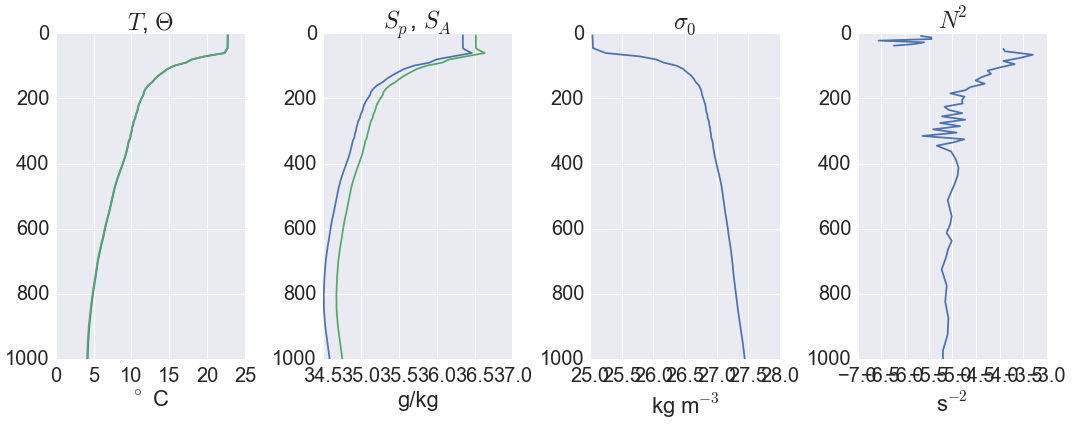

In [132]:
fig, ax = plt.subplots(ncols=4, figsize=(15,6))
ax[0].plot(argo.temp[0], argo.pres[0])
ax[0].plot(CT[0], argo.pres[0])
ax[0].set_xlabel(r'$^\circ$ C')
ax[0].set_title(r'$T$, $\Theta$')

ax[1].plot(argo.psal[0], argo.pres[0])
ax[1].plot(SA[0], argo.pres[0])
ax[1].set_xlabel('g/kg')
ax[1].set_title(r'$S_p$, $S_A$')

ax[2].plot(sig0[0], argo.pres[0])
ax[2].set_xlabel(r'kg m$^{-3}$')
ax[2].set_title(r'$\sigma_0$')

ax[3].plot(np.log10(Nsquared), p_mid)
ax[3].set_xlabel(r's$^{-2}$')
ax[3].set_title(r'$N^{2}$')

[a.set_ylim([1000,0]) for a in ax]
plt.tight_layout()

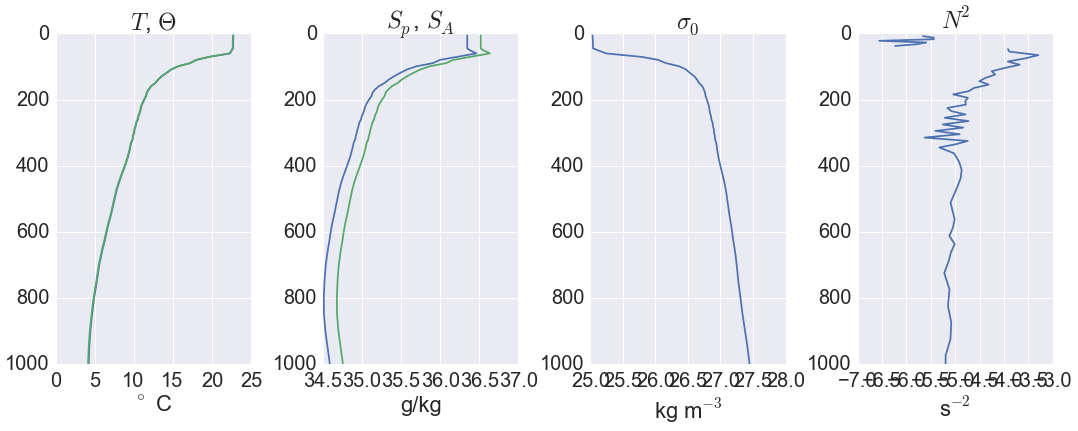

In [134]:
fig.tight_layout()
fig